In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import gc
gc.collect()

31

In [3]:
data = pd.read_csv(r'./input/lending-club-loan-data/loan_encoded.csv', low_memory=False)
data = data.drop(['Unnamed: 0'],axis=1)

In [4]:
data['Loan_Category_Bad'].value_counts()

0    1961647
1     299021
Name: Loan_Category_Bad, dtype: int64

In [5]:
data['Loan_Category_Healthy'].value_counts()
data = data.drop(['Loan_Category_Healthy'],axis=1)

# Approach 1 - Take Equal number of Health & Unhealth Loan records for Training

In [6]:
data_good_loans = data.loc[data['Loan_Category_Bad']==0]
data_bad_loans = data.loc[data['Loan_Category_Bad']==1]

data_good_loans = data_good_loans.iloc[0:290000]
data_final = pd.concat([data_good_loans, data_bad_loans])

y = data_final['Loan_Category_Bad']
X = data_final.drop(['Loan_Category_Bad'],axis=1)

print (y.value_counts())

1    299021
0    290000
Name: Loan_Category_Bad, dtype: int64


### Split data in test & train

In [7]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X,y)

### Train & Predict Using Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs')
lr.fit(trainX, trainY)
predictedY = lr.predict(testX)

C:\MachineLearning\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


# Approach 2 - Take UnEqual number of Health & Unhealth Loan records for Training but use class_weight as balanced

### Split data in test & train

In [21]:
data_good_loans = data.loc[data['Loan_Category_Bad']==0]
data_bad_loans = data.loc[data['Loan_Category_Bad']==1]

data_final = pd.concat([data_good_loans, data_bad_loans])

y = data_final['Loan_Category_Bad']
X = data_final.drop(['Loan_Category_Bad'],axis=1)

print (y.value_counts())
from sklearn.model_selection import train_test_split
trainX_2, testX_2, trainY_2, testY_2 = train_test_split(X,y)

0    1961647
1     299021
Name: Loan_Category_Bad, dtype: int64


### Train & Predict Using Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

lr_2 = LogisticRegression(class_weight='balanced', solver='lbfgs')
lr_2.fit(trainX_2, trainY_2)
predictedY_2 = lr_2.predict(testX_2)

C:\MachineLearning\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


# Evaluate Training Performance

#### Accuracy, Precision, Recall, F1-Score and Confusion Matrix

#### Plot ROC (= FPR vs TPR) Graph

    - ROC graph is a plot of different values of FPR & TPR for different values of Threshold on which model is evaluated
    - For e.g. if Threshold is set to .5 for classification we would get one set of values for FPR and TPR
    - if Threshold is set to 0.6 we would get another set of values for FPR and TPR
    - So, all of these values of FPR and TPR when plotted give an ROC curve
    - What we are looking for are those values of FPR & TPR which are as close to the top left corner of the graph - Why ? Because at top left corner our TPR would be maximum and FPR would be minimum. Which means that the model is giving least False Positives and maximum number of True Postives

In [23]:
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix


print ('Confusion matrix using balanced dataset (Approach 1) \n', confusion_matrix(testY, predictedY))
print ('Accuracy of LogisticRegression model using balanced dataset (Approach 1) is ',accuracy_score(testY, predictedY))
print ('Recall of LogisticRegression model using balanced dataset (Approach 1)  ',recall_score(testY, predictedY))
print ('F1-score of LogisticRegression model using balanced dataset (Approach 1)  ',f1_score(testY, predictedY))
print ('\n ************************************************************************')
print ('Confusion matrix using imbalanced dataset (Approach 2) \n', confusion_matrix(testY_2, predictedY_2))
print ('Accuracy of LogisticRegression model using imbalanced dataset (Approach 2) is ',accuracy_score(testY_2, predictedY_2))
print ('Recall of LogisticRegression model using imbalanced dataset (Approach 2)  ',recall_score(testY_2, predictedY_2))
print ('F1-score of LogisticRegression model using imbalanced dataset (Approach 2)  ',f1_score(testY_2, predictedY_2))

Confusion matrix using balanced dataset (Approach 1) 
 [[71666   949]
 [ 2341 72300]]
Accuracy of LogisticRegression model using balanced dataset (Approach 1) is  0.9776579562123106
Recall of LogisticRegression model using balanced dataset (Approach 1)   0.9686365402392787
F1-score of LogisticRegression model using balanced dataset (Approach 1)   0.9777537358847792

 ************************************************************************
Confusion matrix using imbalanced dataset (Approach 2) 
 [[444298  46010]
 [  9739  65120]]
Accuracy of LogisticRegression model using imbalanced dataset (Approach 2) is  0.9013583595645182
Recall of LogisticRegression model using imbalanced dataset (Approach 2)   0.8699020825819207
F1-score of LogisticRegression model using imbalanced dataset (Approach 2)   0.7002564667802934


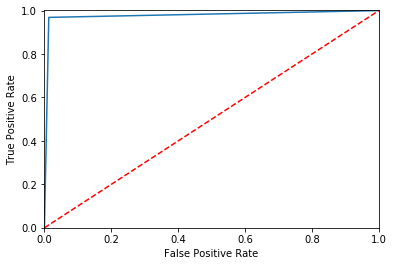

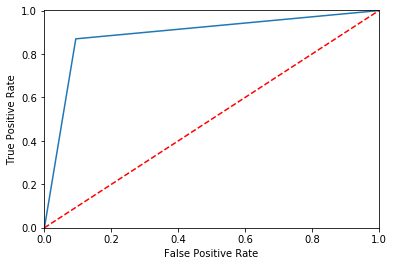

In [24]:
from sklearn.metrics import roc_curve


def show_roc_curve(falsePositiveRate, truePositiveRate):
    plt.plot(falsePositiveRate, truePositiveRate)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.001,1])
    plt.ylim([0,1.001])
    plt.show()
    
fpr, tpr, threshold = roc_curve(testY, predictedY)
fpr_2, tpr_2, threshold_2 = roc_curve(testY_2, predictedY_2)
show_roc_curve(fpr, tpr)
show_roc_curve(fpr_2, tpr_2)

In [13]:
import pickle

# save best model to file
pickle.dump(lr_2, open("lendingclub.pickle.dat", "wb"))

# Neural Model - UnBalanced Dataset - Approach 3

In [25]:
import tensorflow as tf

#Convert X,y dataframes to np.array

data_good_loans = data.loc[data['Loan_Category_Bad']==0]
data_bad_loans = data.loc[data['Loan_Category_Bad']==1]

data_final = pd.concat([data_good_loans, data_bad_loans])

y = data_final['Loan_Category_Bad']
X = data_final.drop(['Loan_Category_Bad'],axis=1)

print (y.value_counts())

X_list = X.values
y_list = np.array(y)

0    1961647
1     299021
Name: Loan_Category_Bad, dtype: int64


In [26]:
trainX_nn, testX_nn, trainY_nn, testY_nn = train_test_split(X_list,y_list)

In [27]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.Dense(150, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit (trainX_nn,trainY_nn, epochs=20, batch_size=32, validation_split=0.3)
model.summary()

Train on 1186850 samples, validate on 508651 samples
Epoch 1/20
1186850/1186850 [==============================] - 66s 56us/sample - loss: 0.2289 - accuracy: 0.9579 - val_loss: 2.3077 - val_accuracy: 0.4286
Epoch 2/20
1186850/1186850 [==============================] - 66s 56us/sample - loss: 0.0945 - accuracy: 0.9747 - val_loss: 0.0673 - val_accuracy: 0.9841
Epoch 3/20
1186850/1186850 [==============================] - 65s 55us/sample - loss: 0.0865 - accuracy: 0.9776 - val_loss: 0.0661 - val_accuracy: 0.9828
Epoch 4/20
1186850/1186850 [==============================] - 64s 54us/sample - loss: 0.0890 - accuracy: 0.9765 - val_loss: 0.0621 - val_accuracy: 0.9860
Epoch 5/20
1186850/1186850 [==============================] - 63s 53us/sample - loss: 0.0917 - accuracy: 0.9752 - val_loss: 0.0645 - val_accuracy: 0.9835
Epoch 6/20
1186850/1186850 [==============================] - 65s 55us/sample - loss: 0.0756 - accuracy: 0.9811 - val_loss: 0.0625 - val_accuracy: 0.9866
Epoch 7/20
1186850/1186

In [28]:
predictedY_nn = model.predict(testX_nn)

In [29]:
predictedY_nn_argmaxed = []
for p in predictedY_nn:
    if p>.5 :
        p = 1
    else :
        p =0
    predictedY_nn_argmaxed.append(p)

In [30]:
print ('Confusion Matrix of NN model is \n',confusion_matrix(testY_nn, predictedY_nn_argmaxed))
print ('Accuracy of NN model is ',accuracy_score(testY_nn, predictedY_nn_argmaxed))
print ('Recall of NN model is ',recall_score(testY_nn, predictedY_nn_argmaxed))
print ('F1-score of NN model is ',f1_score(testY_nn, predictedY_nn_argmaxed))

Confusion Matrix of NN model is 
 [[490630     62]
 [ 10882  63593]]
Accuracy of NN model is  0.9806358120697068
Recall of NN model is  0.8538838536421618
F1-score of NN model is  0.9207702888583218


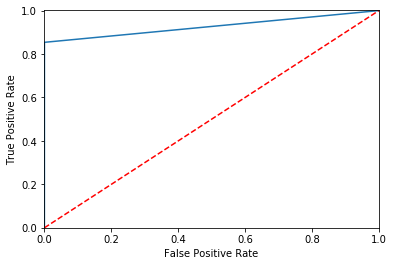

In [31]:
fpr_nn, tpr_nn, threshold_nn = roc_curve(testY_nn, predictedY_nn_argmaxed)
show_roc_curve(fpr_nn, tpr_nn)


# Neural Model - Balanced Dataset - Approach 4

In [32]:
import tensorflow as tf

#Convert X,y dataframes to np.array

data_good_loans = data.loc[data['Loan_Category_Bad']==0]
data_bad_loans = data.loc[data['Loan_Category_Bad']==1]
data_good_loans = data_good_loans.iloc[0:290000]

data_final = pd.concat([data_good_loans, data_bad_loans])

y = data_final['Loan_Category_Bad']
X = data_final.drop(['Loan_Category_Bad'],axis=1)

print (y.value_counts())

X_list = X.values
y_list = np.array(y)

1    299021
0    290000
Name: Loan_Category_Bad, dtype: int64


In [33]:
trainX_nn_2, testX_nn_2, trainY_nn_2, testY_nn_2 = train_test_split(X_list,y_list)

In [34]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.Dense(150, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_2 = model.fit (trainX_nn_2,trainY_nn_2, epochs=20, batch_size=32, validation_split=0.3)
model.summary()

Train on 309235 samples, validate on 132530 samples
Epoch 1/20
309235/309235 [==============================] - 17s 54us/sample - loss: 0.6455 - accuracy: 0.9286 - val_loss: 0.0750 - val_accuracy: 0.9775
Epoch 2/20
309235/309235 [==============================] - 17s 54us/sample - loss: 0.0915 - accuracy: 0.9725 - val_loss: 0.1298 - val_accuracy: 0.9557
Epoch 3/20
309235/309235 [==============================] - 17s 54us/sample - loss: 0.0743 - accuracy: 0.9783 - val_loss: 0.0874 - val_accuracy: 0.9710
Epoch 4/20
309235/309235 [==============================] - 17s 54us/sample - loss: 0.0692 - accuracy: 0.9799 - val_loss: 0.0771 - val_accuracy: 0.9758
Epoch 5/20
309235/309235 [==============================] - 16s 53us/sample - loss: 0.0666 - accuracy: 0.9811 - val_loss: 0.0583 - val_accuracy: 0.9826
Epoch 6/20
309235/309235 [==============================] - 16s 53us/sample - loss: 0.0628 - accuracy: 0.9822 - val_loss: 0.0550 - val_accuracy: 0.9865
Epoch 7/20
309235/309235 [==========

In [35]:
predictedY_nn_2 = model.predict(testX_nn_2)
predictedY_nn_2_argmaxed = []
for p in predictedY_nn_2:
    if p>.5 :
        p = 1
    else :
        p =0
    predictedY_nn_2_argmaxed.append(p)
    
print ('Confusion Matrix of NN model with balanced dataset is \n',confusion_matrix(testY_nn_2, predictedY_nn_2_argmaxed))
print ('Accuracy of NN model with balanced dataset is ',accuracy_score(testY_nn_2, predictedY_nn_2_argmaxed))
print ('Recall of NN model with balanced dataset is ',recall_score(testY_nn_2, predictedY_nn_2_argmaxed))
print ('F1-score of NN model with balanced dataset is ',f1_score(testY_nn_2, predictedY_nn_2_argmaxed))

Confusion Matrix of NN model with balanced dataset is 
 [[72428    93]
 [ 1934 72801]]
Accuracy of NN model with balanced dataset is  0.9862348563046667
Recall of NN model with balanced dataset is  0.9741218973707099
F1-score of NN model with balanced dataset is  0.9862696353697444


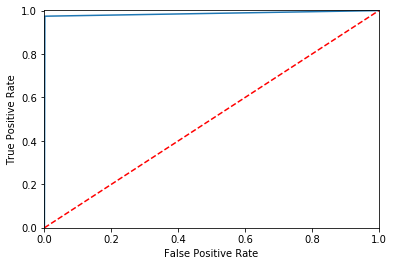

In [36]:
fpr_nn, tpr_nn, threshold_nn = roc_curve(testY_nn_2, predictedY_nn_2_argmaxed)
show_roc_curve(fpr_nn, tpr_nn)


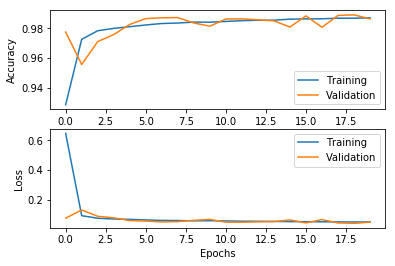

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

figure = plt.figure()

ax1 = figure.add_subplot(211)
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(labels=['Training','Validation'])

ax1 = figure.add_subplot(212)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(labels=['Training','Validation'])

plt.show()